<a href="https://colab.research.google.com/github/wizard-2028/digitRecognition/blob/main/salesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing **Libraries**

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Data Collecting and Processing**

In [129]:
# Load data
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/Test.csv')


In [130]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [131]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [132]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [133]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [134]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [135]:
sns.set()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


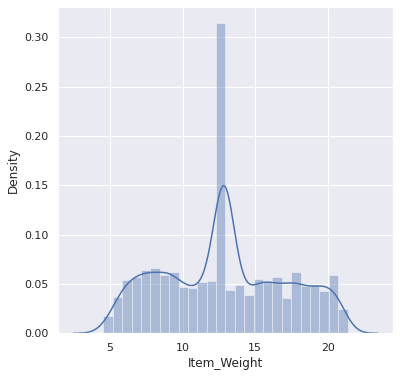

In [136]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


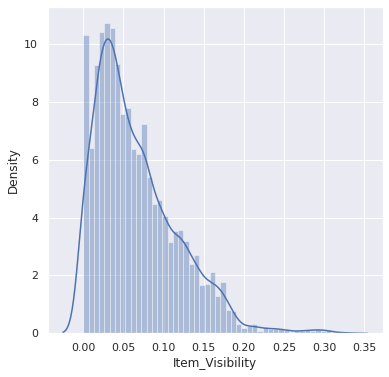

In [137]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


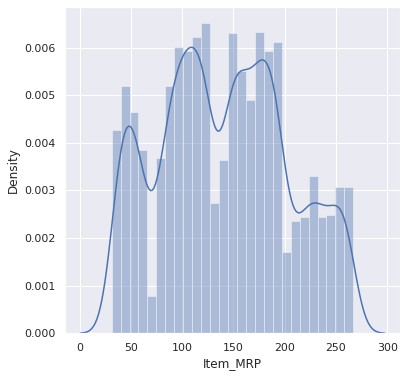

In [138]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


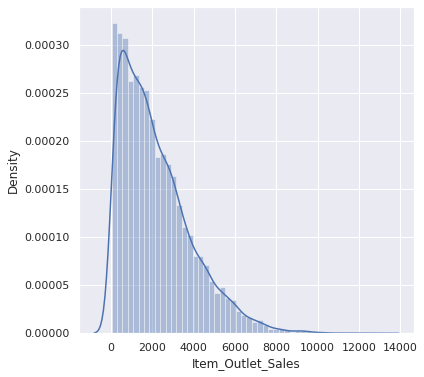

In [139]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

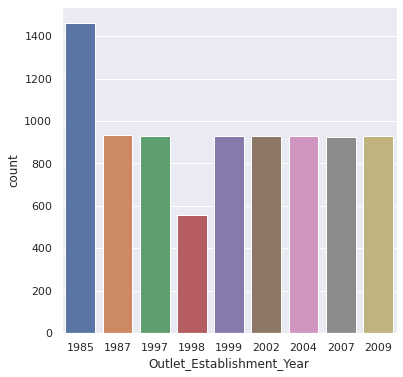

In [140]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

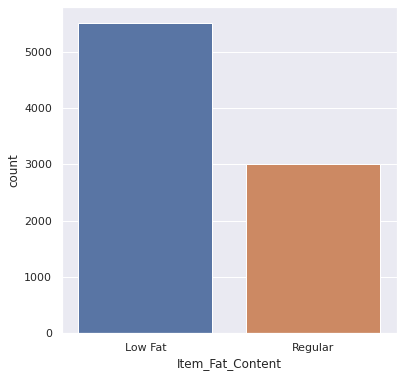

In [141]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

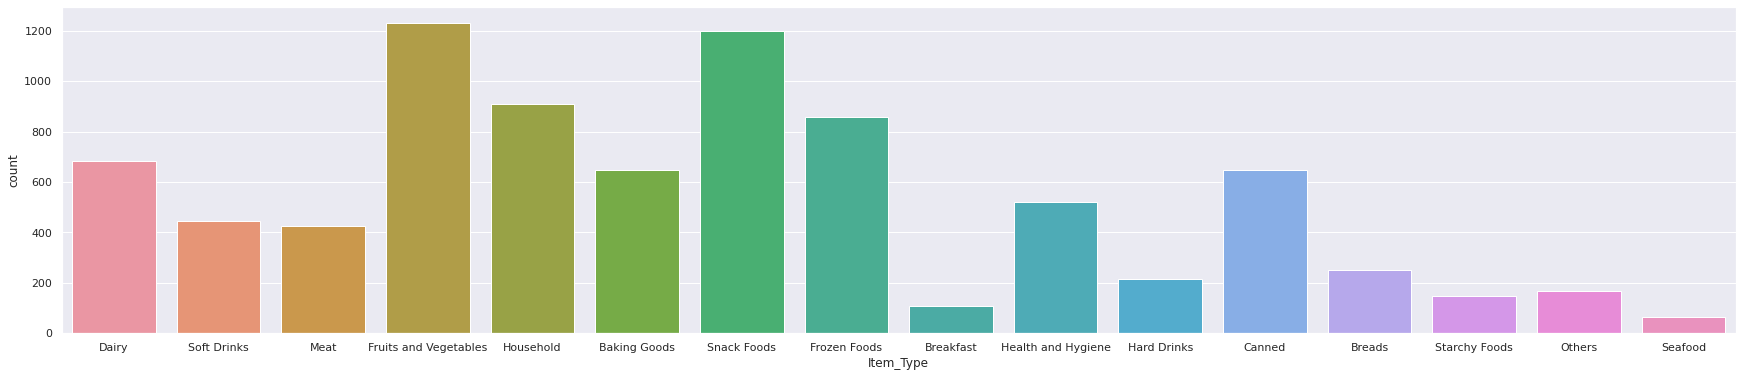

In [142]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

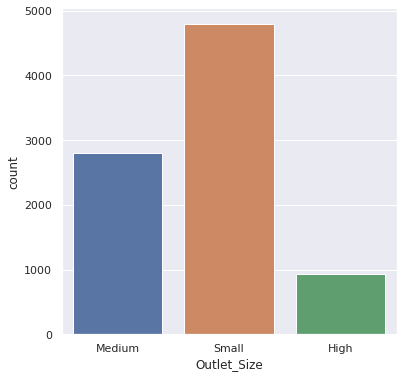

In [143]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

# Preprocessing

In [144]:
# Preprocessing
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(), inplace=True)
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)

train_df['Outlet_Size'].fillna('Unknown', inplace=True)
test_df['Outlet_Size'].fillna('Unknown', inplace=True)

train_df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)
test_df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)


In [145]:
print(test_data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


# **One-hot encoding**


In [146]:

train_df = pd.get_dummies(train_df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
test_df = pd.get_dummies(test_df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


# Split into train and validation sets


In [147]:
X = train_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
y = train_df['Item_Outlet_Sales']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [148]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error





# Define XGBoost model


In [149]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, seed=42)


# Train the model


In [150]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='rmse', eval_set=[(X_train, y_train), (X_valid, y_valid)])


[0]	validation_0-rmse:2676.60820	validation_1-rmse:2553.88959
[1]	validation_0-rmse:2565.61243	validation_1-rmse:2447.20635
[2]	validation_0-rmse:2460.15083	validation_1-rmse:2346.15316
[3]	validation_0-rmse:2361.76718	validation_1-rmse:2252.50733
[4]	validation_0-rmse:2283.32173	validation_1-rmse:2175.04232
[5]	validation_0-rmse:2195.36989	validation_1-rmse:2090.05015
[6]	validation_0-rmse:2112.57313	validation_1-rmse:2010.86901
[7]	validation_0-rmse:2034.54971	validation_1-rmse:1936.40164
[8]	validation_0-rmse:1974.60130	validation_1-rmse:1877.82268
[9]	validation_0-rmse:1918.22205	validation_1-rmse:1822.33892
[10]	validation_0-rmse:1852.93425	validation_1-rmse:1759.68655
[11]	validation_0-rmse:1791.54503	validation_1-rmse:1701.13862


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1735.19781	validation_1-rmse:1648.20641
[13]	validation_0-rmse:1692.55045	validation_1-rmse:1607.19764
[14]	validation_0-rmse:1642.97947	validation_1-rmse:1560.76433
[15]	validation_0-rmse:1595.05423	validation_1-rmse:1515.80976
[16]	validation_0-rmse:1561.20444	validation_1-rmse:1483.45557
[17]	validation_0-rmse:1519.05209	validation_1-rmse:1443.81680
[18]	validation_0-rmse:1489.73492	validation_1-rmse:1415.88723
[19]	validation_0-rmse:1453.72004	validation_1-rmse:1382.79612
[20]	validation_0-rmse:1419.94581	validation_1-rmse:1351.97966
[21]	validation_0-rmse:1388.86695	validation_1-rmse:1323.22122
[22]	validation_0-rmse:1366.96770	validation_1-rmse:1302.48827
[23]	validation_0-rmse:1338.72963	validation_1-rmse:1277.45475
[24]	validation_0-rmse:1313.49187	validation_1-rmse:1255.26014
[25]	validation_0-rmse:1290.09095	validation_1-rmse:1234.09839
[26]	validation_0-rmse:1274.12328	validation_1-rmse:1219.50555
[27]	validation_0-rmse:1253.75006	validation_1-rmse:120

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Make predictions on test data


In [151]:
X_test = test_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_df['Item_Outlet_Sales'] = xgb_model.predict(X_test)


# Save predictions to file


In [152]:
test_df[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']].to_csv('submission.csv', index=False)


# Calculate and print metrics


In [153]:
y_valid_pred = xgb_model.predict(X_valid)
mse = mean_squared_error(y_valid, y_valid_pred)
mae = mean_absolute_error(y_valid, y_valid_pred)
r2 = r2_score(y_valid, y_valid_pred)

# Print metrics
print('MSE: {}, MAE: {}, R-squared: {}'.format(mse, mae, r2))





MSE: 1067542.3186161479, MAE: 720.8966382517392, R-squared: 0.607228081085895
